In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

yeniseysk ru
adrar dz
bataipora br
ushuaia ar
calamar co
bluff nz
punta arenas cl
ancud cl
taolanaro mg
kabare cd
gat ly
barrow us
roald no
yulara au
boa vista br
clyde river ca
mataura pf
torquay gb
fuerte olimpo py
tuatapere nz
tasiilaq gl
husavik is
vaini to
carnarvon au
taolanaro mg
illoqqortoormiut gl
taolanaro mg
umzimvubu za
sitka us
vaini to
kodiak us
meulaboh id
qaanaaq gl
pangnirtung ca
kodiak us
ambulu id
avarua ck
kruisfontein za
illoqqortoormiut gl
avarua ck
salym ru
busselton au
mys shmidta ru
dikson ru
namibe ao
ponta do sol cv
klaksvik fo
pundaguitan ph
aklavik ca
saint-philippe re
takoradi gh
kodiak us
bambous virieux mu
launceston au
new norfolk au
dikson ru
santa barbara mx
bluff nz
east london za
bandarbeyla so
vaitupu wf
ciudad guayana ve
bonavista ca
rikitea pf
ilulissat gl
souillac mu
norman wells ca
kangaatsiaq gl
puerto maldonado pe
fomboni km
ushuaia ar
xadani mx
punta arenas cl
puerto ayora ec
kapaa us
kashan ir
khatanga ru
kulhudhuffushi mv
rikitea pf
sinnam

barentsburg sj
aklavik ca
bridlington gb
albany au
taolanaro mg
rocha uy
east london za
mataura pf
bredasdorp za
taolanaro mg
new norfolk au
tasiilaq gl
rikitea pf
kloulklubed pw
mataura pf
taolanaro mg
barrow us
naftah tn
rikitea pf
ponta do sol cv
soe id
les cayes ht
arraial do cabo br
sentyabrskiy ru
saskylakh ru
bambous virieux mu
mataura pf
beloha mg
hobart au
hammerfest no
mason city us
castro cl
hermanus za
yellowknife ca
labuhan id
mar del plata ar
hermanus za
salalah om
bluff nz
albany au
narsaq gl
astana kz
simao cn
norman wells ca
pevek ru
vagur fo
albany au
qaanaaq gl
muros es
albany au
ponta delgada pt
troy us
ushuaia ar
belushya guba ru
hobart au
saskylakh ru
marovoay mg
mataura pf
longyearbyen sj
kapaa us
solnechnyy ru
destin us
atuona pf
ushuaia ar
busselton au
safaga eg
sarana ru
touros br
mahebourg mu
cabo san lucas mx
puerto ayora ec
lucapa ao
aranos na
illoqqortoormiut gl
tambul sd
hobart au
banda aceh id
lompoc us
belmonte br
mataura pf
sao filipe cv
yellowknife ca

barentsburg sj
mecca sa
avarua ck
belushya guba ru
severo-kurilsk ru
berlevag no
chokurdakh ru
pljevlja me
esperance au
fortuna us
iqaluit ca
katsuura jp
chokurdakh ru
cradock za
punta arenas cl
rikitea pf
kaspiyskiy ru
pontes e lacerda br
balingasay ph
mataura pf
port alfred za
matamoros mx
illoqqortoormiut gl
puerto ayora ec
bambous virieux mu
ushuaia ar
mataura pf
arraial do cabo br
lebu cl
hermanus za
esperance au
vaini to
guerrero negro mx
dien bien vn
esperance au
saint-philippe re
yellowknife ca
grand gaube mu
cape town za
port hardy ca
te anau nz
hermanus za
guerrero negro mx
vao nc
mataura pf
pouembout nc
souillac mu
cape town za
burica pa
lata sb
hobart au
kapaa us
soissons fr
bethel us
saryshagan kz
tasiilaq gl
alpena us
esperance au
hauterive ca
sao filipe cv
victoria sc
hithadhoo mv
amderma ru
luganville vu
rikitea pf
salalah om
fort wellington gy
torbay ca
noumea nc
ushuaia ar
guerrero negro mx
soe id
soyo ao
saskylakh ru
grand gaube mu
upernavik gl
ostrovnoy ru
inegol tr

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + weather_api_key 

In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yeniseysk
Processing Record 2 of Set 1 | adrar
Processing Record 3 of Set 1 | bataipora
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | calamar
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | ancud
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | kabare
Processing Record 11 of Set 1 | gat
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | roald
Processing Record 14 of Set 1 | yulara
Processing Record 15 of Set 1 | boa vista
Processing Record 16 of Set 1 | clyde river
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | torquay
Processing Record 19 of Set 1 | fuerte olimpo
Processing Record 20 of Set 1 | tuatapere
Processing Record 21 of Set 1 | tasiilaq
Processing Record 22 of Set 1 | husavik
Processing Record 23 of Set 1 

Processing Record 39 of Set 4 | tamulte
City not found. Skipping...
Processing Record 40 of Set 4 | ngunguru
Processing Record 41 of Set 4 | aguimes
Processing Record 42 of Set 4 | turukhansk
Processing Record 43 of Set 4 | jasper
Processing Record 44 of Set 4 | niihama
Processing Record 45 of Set 4 | brigham city
Processing Record 46 of Set 4 | terrace
Processing Record 47 of Set 4 | codrington
Processing Record 48 of Set 4 | diamantino
Processing Record 49 of Set 4 | grand centre
City not found. Skipping...
Processing Record 50 of Set 4 | samusu
City not found. Skipping...
Processing Record 1 of Set 5 | leningradskiy
Processing Record 2 of Set 5 | saint anthony
Processing Record 3 of Set 5 | bengkulu
Processing Record 4 of Set 5 | mandalgovi
Processing Record 5 of Set 5 | chipinge
Processing Record 6 of Set 5 | zhetybay
City not found. Skipping...
Processing Record 7 of Set 5 | meadow lake
Processing Record 8 of Set 5 | chuy
Processing Record 9 of Set 5 | kargil
Processing Record 10 

Processing Record 25 of Set 8 | belmonte
Processing Record 26 of Set 8 | santa maria
Processing Record 27 of Set 8 | krasnoselkup
Processing Record 28 of Set 8 | ust-kuyga
Processing Record 29 of Set 8 | suzhou
Processing Record 30 of Set 8 | pervomayskiy
Processing Record 31 of Set 8 | dingle
Processing Record 32 of Set 8 | yerbogachen
Processing Record 33 of Set 8 | abeche
Processing Record 34 of Set 8 | hailar
Processing Record 35 of Set 8 | evensk
Processing Record 36 of Set 8 | suntar
Processing Record 37 of Set 8 | schwabach
Processing Record 38 of Set 8 | gannan
Processing Record 39 of Set 8 | grand gaube
Processing Record 40 of Set 8 | san patricio
Processing Record 41 of Set 8 | hobyo
Processing Record 42 of Set 8 | benalla
Processing Record 43 of Set 8 | mindelo
Processing Record 44 of Set 8 | lavrentiya
Processing Record 45 of Set 8 | kyabe
Processing Record 46 of Set 8 | verkhnevilyuysk
Processing Record 47 of Set 8 | kilindoni
Processing Record 48 of Set 8 | tezu
Processin

Processing Record 13 of Set 12 | kodinsk
Processing Record 14 of Set 12 | olga
Processing Record 15 of Set 12 | bushehr
Processing Record 16 of Set 12 | nouadhibou
Processing Record 17 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 18 of Set 12 | orissaare
Processing Record 19 of Set 12 | nhulunbuy
Processing Record 20 of Set 12 | mogadishu
Processing Record 21 of Set 12 | polunochnoye
Processing Record 22 of Set 12 | berlevag
Processing Record 23 of Set 12 | pljevlja
Processing Record 24 of Set 12 | cradock
Processing Record 25 of Set 12 | kaspiyskiy
Processing Record 26 of Set 12 | pontes e lacerda
Processing Record 27 of Set 12 | balingasay
Processing Record 28 of Set 12 | matamoros
Processing Record 29 of Set 12 | dien bien
City not found. Skipping...
Processing Record 30 of Set 12 | te anau
Processing Record 31 of Set 12 | pouembout
Processing Record 32 of Set 12 | burica
City not found. Skipping...
Processing Record 33 of Set 12 | soissons
Processing Record 

In [13]:
len(city_data)

550

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yeniseysk,58.4497,92.1703,273.09,94,91,2.60,RU,2022-10-13 18:11:19
1,Adrar,20.5022,-10.0711,305.69,18,98,4.35,MR,2022-10-13 18:11:20
2,Bataipora,-22.2953,-53.2711,300.35,65,100,1.62,BR,2022-10-13 18:11:21
3,Ushuaia,-54.8000,-68.3000,280.94,61,75,9.26,AR,2022-10-13 18:11:22
4,Calamar,10.2511,-74.9146,302.77,69,100,2.18,CO,2022-10-13 18:11:23
5,Bluff,-46.6000,168.3333,278.05,88,23,4.32,NZ,2022-10-13 18:11:23
6,Punta Arenas,-53.1500,-70.9167,282.21,46,40,8.23,CL,2022-10-13 18:10:09
7,Ancud,-41.8697,-73.8203,280.23,75,98,5.11,CL,2022-10-13 18:11:24
8,Kabare,-2.4683,28.8242,291.48,78,75,0.15,CD,2022-10-13 18:11:25
9,Gat,31.6100,34.7642,296.53,100,7,2.03,IL,2022-10-13 18:11:25


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yeniseysk,RU,2022-10-13 18:11:19,58.4497,92.1703,273.09,94,91,2.60
1,Adrar,MR,2022-10-13 18:11:20,20.5022,-10.0711,305.69,18,98,4.35
2,Bataipora,BR,2022-10-13 18:11:21,-22.2953,-53.2711,300.35,65,100,1.62
3,Ushuaia,AR,2022-10-13 18:11:22,-54.8000,-68.3000,280.94,61,75,9.26
4,Calamar,CO,2022-10-13 18:11:23,10.2511,-74.9146,302.77,69,100,2.18
5,Bluff,NZ,2022-10-13 18:11:23,-46.6000,168.3333,278.05,88,23,4.32
6,Punta Arenas,CL,2022-10-13 18:10:09,-53.1500,-70.9167,282.21,46,40,8.23
7,Ancud,CL,2022-10-13 18:11:24,-41.8697,-73.8203,280.23,75,98,5.11
8,Kabare,CD,2022-10-13 18:11:25,-2.4683,28.8242,291.48,78,75,0.15
9,Gat,IL,2022-10-13 18:11:25,31.6100,34.7642,296.53,100,7,2.03


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

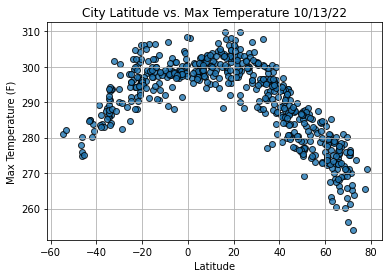

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

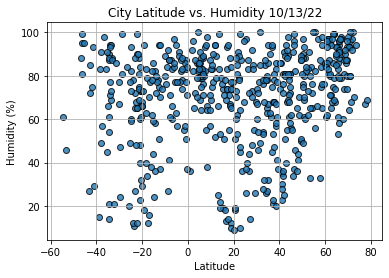

In [25]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

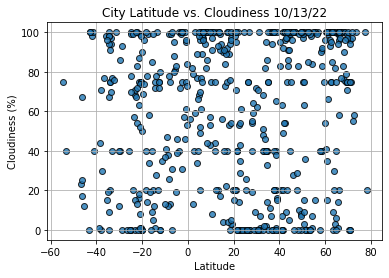

In [26]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

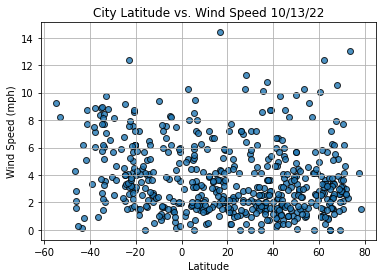

In [73]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [90]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [91]:
#Create the Northern Hemisphere DataFrame
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [92]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yeniseysk,RU,2022-10-13 18:11:19,58.4497,92.1703,273.09,94,91,2.60
1,Adrar,MR,2022-10-13 18:11:20,20.5022,-10.0711,305.69,18,98,4.35
4,Calamar,CO,2022-10-13 18:11:23,10.2511,-74.9146,302.77,69,100,2.18
9,Gat,IL,2022-10-13 18:11:25,31.6100,34.7642,296.53,100,7,2.03
10,Barrow,US,2022-10-13 18:11:26,71.2906,-156.7887,270.16,68,75,4.63


In [93]:
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Bataipora,BR,2022-10-13 18:11:21,-22.2953,-53.2711,300.35,65,100,1.62
3,Ushuaia,AR,2022-10-13 18:11:22,-54.8000,-68.3000,280.94,61,75,9.26
5,Bluff,NZ,2022-10-13 18:11:23,-46.6000,168.3333,278.05,88,23,4.32
6,Punta Arenas,CL,2022-10-13 18:10:09,-53.1500,-70.9167,282.21,46,40,8.23
7,Ancud,CL,2022-10-13 18:11:24,-41.8697,-73.8203,280.23,75,98,5.11


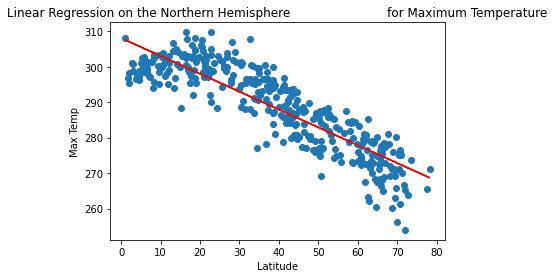

In [94]:
# Linear regression on the Northern Hemisphere and Max Temp 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
    
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(40,10))

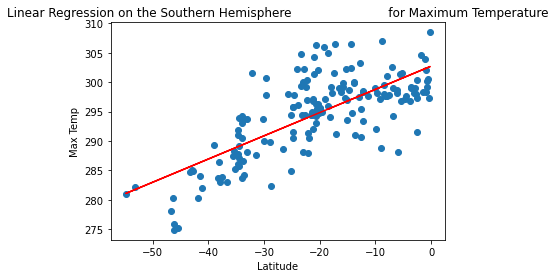

In [95]:
# Linear regression on the Southern Hemisphere and Max Temp 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,15))

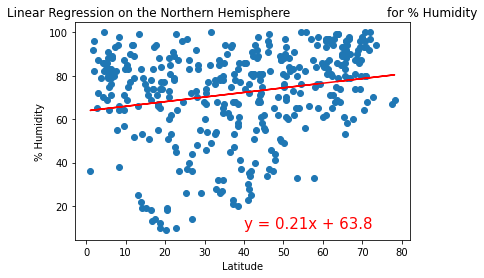

In [96]:
# Linear regression on the Northern Hemisphere and Humidity 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

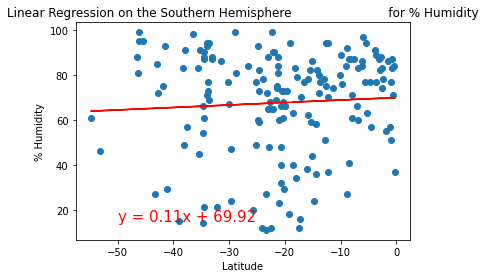

In [97]:
# Linear regression on the Southern Hemisphere and Humidity 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

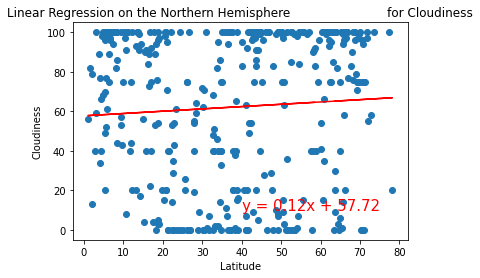

In [99]:
# Linear regression on the Northern Hemisphere and Cloudiness 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
    
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(40,10))

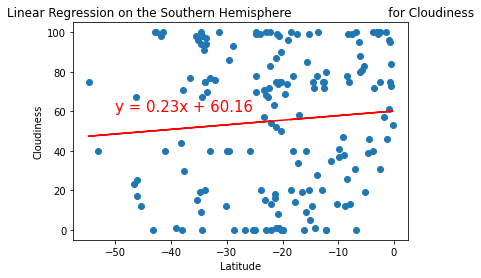

In [101]:
# Linear regression on the Southern Hemisphere and Cloudiness 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
    
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Cloudiness', 'Cloudiness',(-50,60))

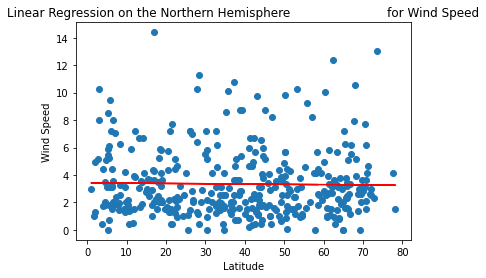

In [102]:
# Linear regression on the Northern Hemisphere and Wind Speed 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

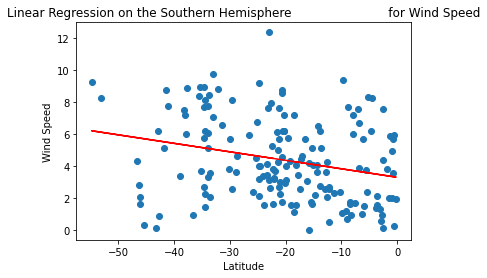

In [103]:
# Linear regression on the Southern Hemisphere and Wind Speed 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))